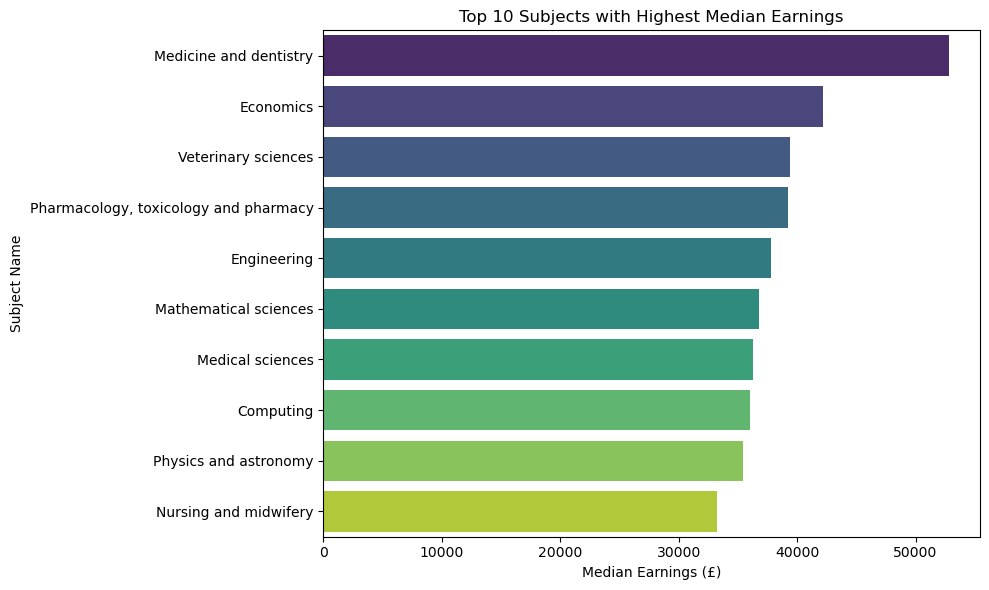

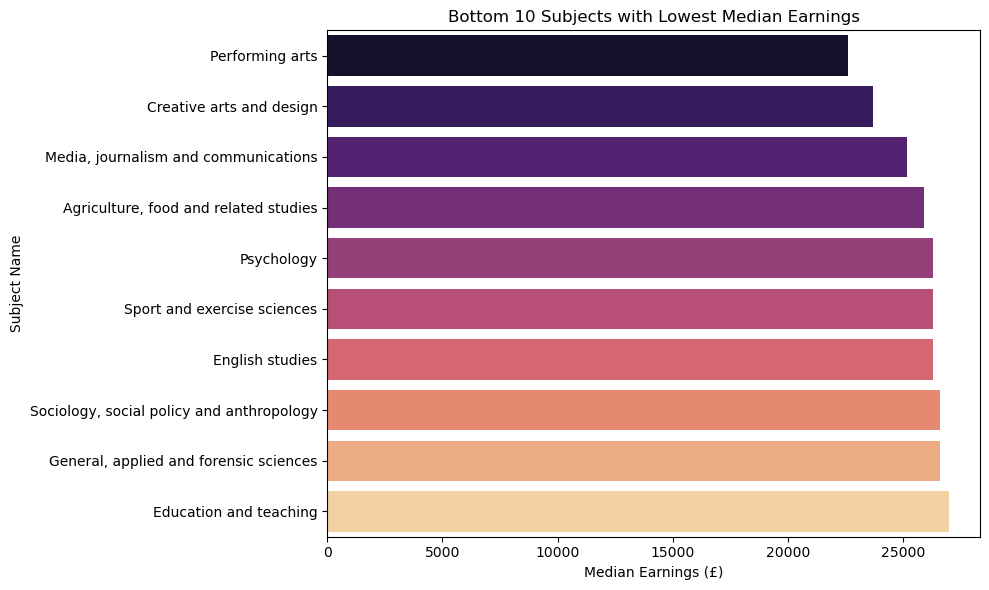

Summary statistics for providers' analysis:
       total_providers  median_earnings
count        35.000000        35.000000
mean         69.800000     31288.571429
std          32.151114      6080.188243
min           4.000000     22600.000000
25%          45.000000     26800.000000
50%          73.000000     29900.000000
75%          95.000000     34300.000000
max         126.000000     52800.000000

Regression summary for provider impact on graduate earnings:
                            OLS Regression Results                            
Dep. Variable:        median_earnings   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     3.986
Date:                Thu, 19 Dec 2024   Prob (F-statistic):             0.0542
Time:                        08:39:51   Log-Likelihood:                -352.11
No. Observations:                  35   AIC:                

In [74]:
# Analysis of Provider Impact on Graduate Earnings 

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the relevant dataset
outcomes_earnings_subject = pd.read_csv('outcomes_earnings_subject_2122ees.csv')

# Rename columns for consistency and easier merging
outcomes_earnings_subject.columns = outcomes_earnings_subject.columns.str.strip().str.lower().str.replace(' ', '_')

# Step 1: Extract relevant columns for provider analysis
provider_earnings = outcomes_earnings_subject[['subject_name', 'providers_earnings', 'earnings_median']]

# Step 2: Group by provider (in this case, "subject_name" appears to be acting as a proxy for providers)
provider_earnings_grouped = provider_earnings.groupby('subject_name').agg(
    total_providers=('providers_earnings', 'sum'),  # Total number of providers offering this subject
    median_earnings=('earnings_median', 'median')  # Median earnings of graduates from this subject
).reset_index()

# Step 3: Identify top 10 providers with the highest median earnings
top_10_providers = provider_earnings_grouped.sort_values(by='median_earnings', ascending=False).head(10)

# Step 4: Identify bottom 10 providers with the lowest median earnings
bottom_10_providers = provider_earnings_grouped.sort_values(by='median_earnings', ascending=True).head(10)

# Step 5: Visualize the Top 10 Subjects by Median Earnings
plt.figure(figsize=(10, 6))
sns.barplot(
    x='median_earnings', 
    y='subject_name', 
    data=top_10_providers, 
    hue='subject_name', 
    dodge=False, 
    palette='viridis', 
    legend=False  # Hide legend
)
plt.title('Top 10 Subjects with Highest Median Earnings')
plt.xlabel('Median Earnings (£)')
plt.ylabel('Subject Name')
plt.tight_layout()
plt.show()

# Step 6: Visualize the Bottom 10 Subjects by Median Earnings
plt.figure(figsize=(10, 6))
sns.barplot(
    x='median_earnings', 
    y='subject_name', 
    data=bottom_10_providers, 
    hue='subject_name', 
    dodge=False, 
    palette='magma', 
    legend=False  # Hide legend
)
plt.title('Bottom 10 Subjects with Lowest Median Earnings')
plt.xlabel('Median Earnings (£)')
plt.ylabel('Subject Name')
plt.tight_layout()
plt.show()

# Step 7: Summary Statistics for Provider Analysis
provider_summary_statistics = provider_earnings_grouped.describe()

# Print summary statistics to understand key metrics of total providers and median earnings
print("Summary statistics for providers' analysis:")
print(provider_summary_statistics)

# Step 8: Regression Analysis to identify the relationship between providers and earnings
# This step aims to understand how the number of providers impacts the median earnings of graduates

# Prepare the data for regression analysis
X = provider_earnings_grouped['total_providers']  # Number of providers for each subject
y = provider_earnings_grouped['median_earnings']  # Median earnings for each subject

# Add a constant to the independent variable for regression
X = sm.add_constant(X)  # Adds a constant term (intercept) to the model

# Fit the regression model
regression_model = sm.OLS(y, X).fit()

# Get the regression summary
regression_summary = regression_model.summary()

# Print regression summary for interpretation
print("\nRegression summary for provider impact on graduate earnings:")
print(regression_summary)


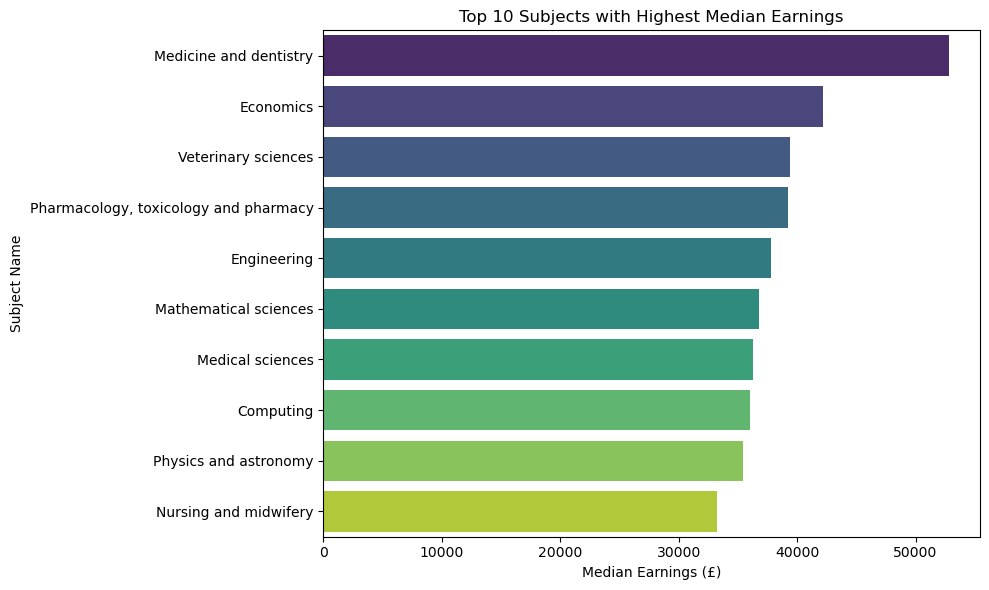

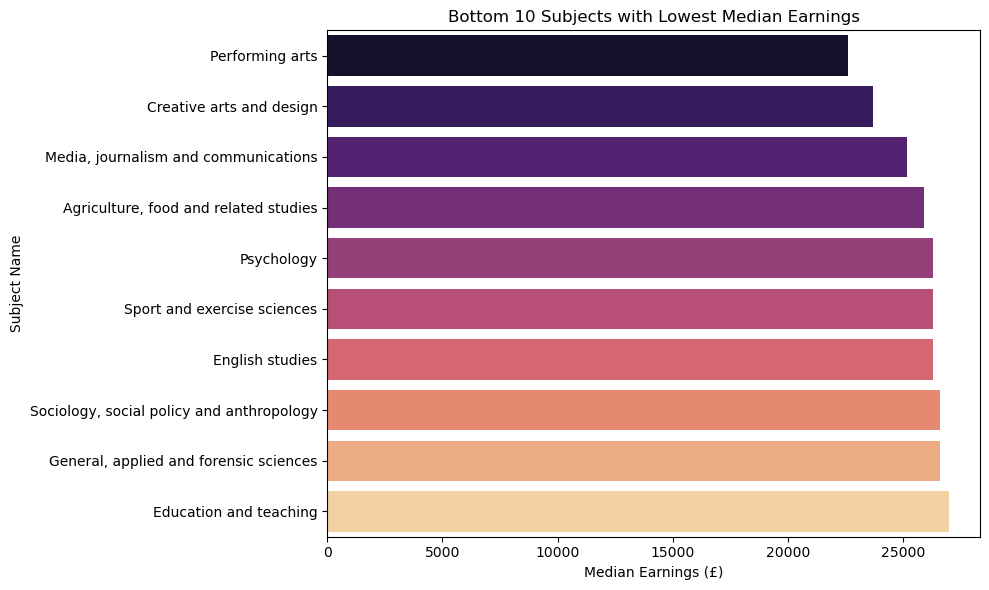

C:\Users\admin\AppData\Local\Temp\ipykernel_5784\2341219917.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_earnings_subset.dropna(inplace=True)


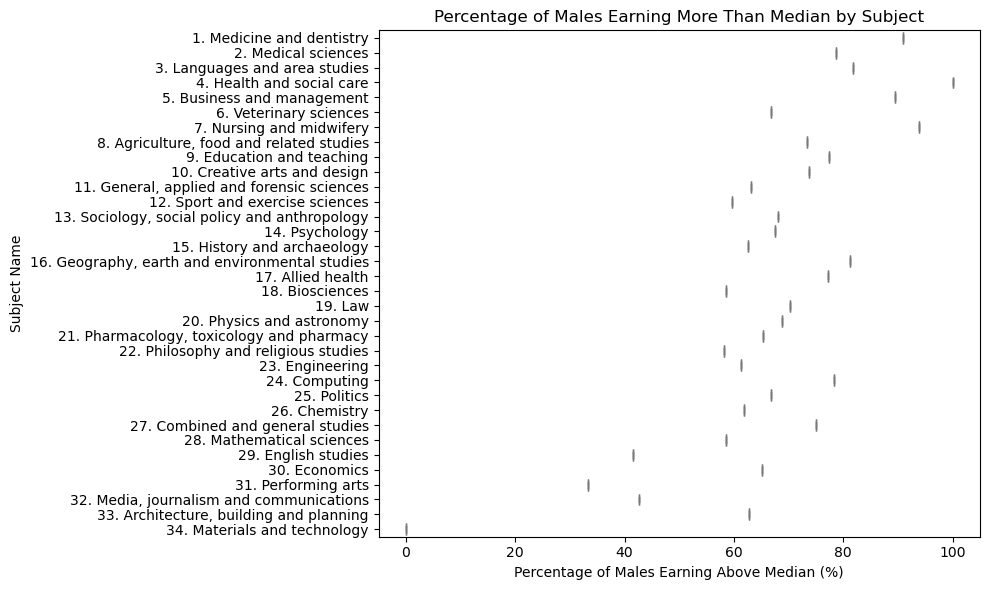

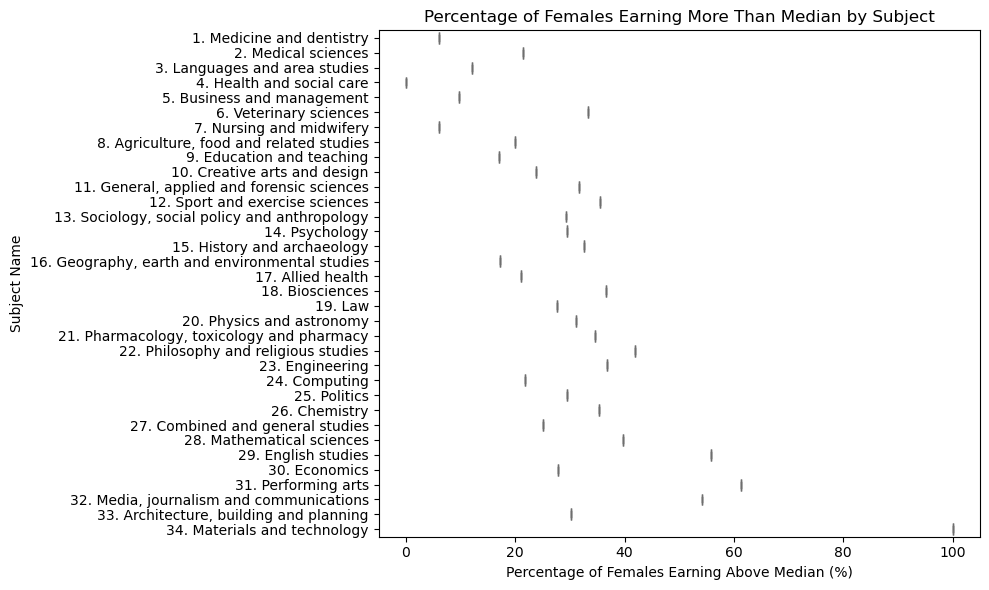

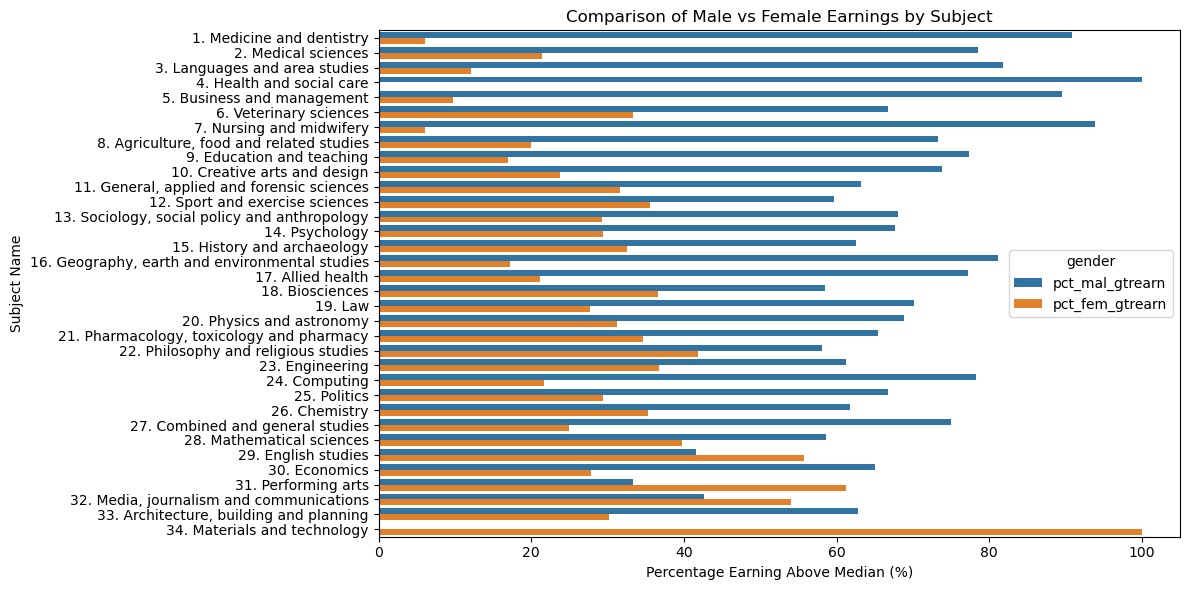

C:\Users\admin\OneDrive - University of Exeter\Desktop\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


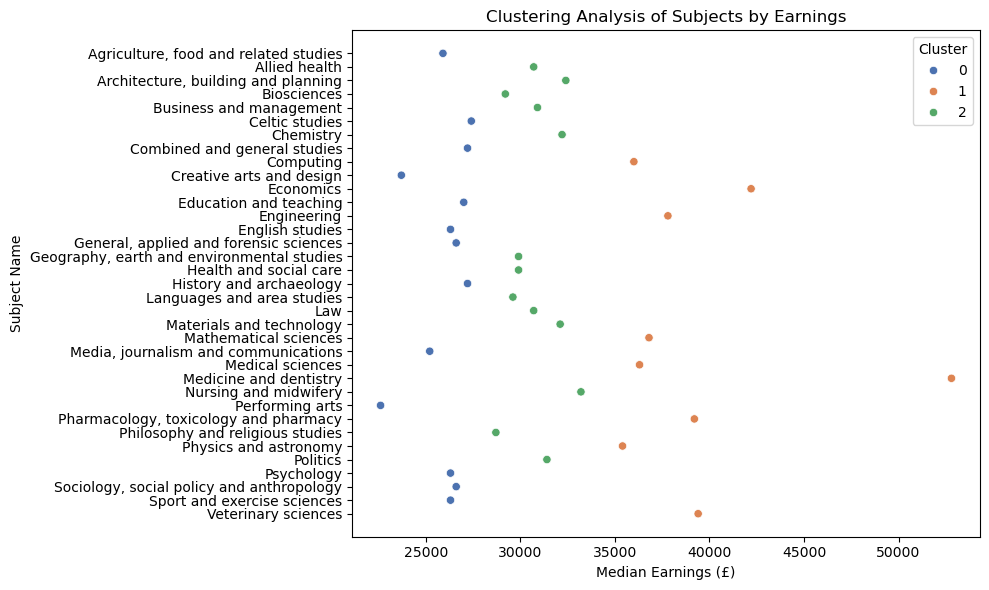


Cluster Summary:
         count          mean          std      min      25%      50%      75%  \
cluster                                                                         
0         13.0  26023.076923  1423.700487  22600.0  25900.0  26300.0  27000.0   
1          9.0  39544.444444  5405.347147  35400.0  36300.0  37800.0  39400.0   
2         13.0  30838.461538  1365.368364  28700.0  29900.0  30700.0  32100.0   

             max  
cluster           
0        27400.0  
1        52800.0  
2        33200.0  


In [101]:
#Analysis of Subject Impact on Graduate Earnings 

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# File names 
file_subject = 'outcomes_earnings_subject_2122ees.csv'
file_gender = 'earnings_by_subject_sex_2122ees.csv'

# Load datasets with error handling
try:
    subject_earnings = pd.read_csv(file_subject)
    gender_earnings = pd.read_csv(file_gender)
except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Ensure that both 'outcomes_earnings_subject_2122ees.csv' and 'earnings_by_subject_sex_2122ees.csv' are in the same directory as this script.")
    raise

# Clean column names (make lowercase, remove spaces)
subject_earnings.columns = subject_earnings.columns.str.strip().str.lower().str.replace(' ', '_')
gender_earnings.columns = gender_earnings.columns.str.strip().str.lower().str.replace(' ', '_')

# Handle missing values
subject_earnings.dropna(inplace=True)
gender_earnings.dropna(inplace=True)

# Extract relevant columns for subject analysis
subject_earnings_subset = subject_earnings[['subject_name', 'earnings_median']]

# Group by subject and calculate median earnings for each subject
subject_earnings_grouped = subject_earnings_subset.groupby('subject_name').agg(
    median_earnings=('earnings_median', 'median')
).reset_index()

# Identify top 10 and bottom 10 subjects by median earnings
top_10_subjects = subject_earnings_grouped.sort_values(by='median_earnings', ascending=False).head(10)
bottom_10_subjects = subject_earnings_grouped.sort_values(by='median_earnings', ascending=True).head(10)

# Plot Top 10 Subjects
plt.figure(figsize=(10, 6))
sns.barplot(x='median_earnings', y='subject_name', data=top_10_subjects, palette='viridis', hue='subject_name', dodge=False)
plt.title('Top 10 Subjects with Highest Median Earnings')
plt.xlabel('Median Earnings (£)')
plt.ylabel('Subject Name')
plt.legend([],[], frameon=False)  # Remove the legend
plt.tight_layout()
plt.show()

# Plot Bottom 10 Subjects
plt.figure(figsize=(10, 6))
sns.barplot(x='median_earnings', y='subject_name', data=bottom_10_subjects, palette='magma', hue='subject_name', dodge=False)
plt.title('Bottom 10 Subjects with Lowest Median Earnings')
plt.xlabel('Median Earnings (£)')
plt.ylabel('Subject Name')
plt.legend([],[], frameon=False)  # Remove the legend
plt.tight_layout()
plt.show()

# Extract relevant columns for gender analysis
gender_earnings_subset = gender_earnings[['subject_name', 'num_mal_gtrearn', 'num_fem_gtrearn', 'pct_mal_gtrearn', 'pct_fem_gtrearn']]

# Handle any missing values
gender_earnings_subset.dropna(inplace=True)

# Plot gender-based earnings differences using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='pct_mal_gtrearn', y='subject_name', data=gender_earnings_subset, orient='h', color='lightblue')
plt.title('Percentage of Males Earning More Than Median by Subject')
plt.xlabel('Percentage of Males Earning Above Median (%)')
plt.ylabel('Subject Name')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='pct_fem_gtrearn', y='subject_name', data=gender_earnings_subset, orient='h', color='lightcoral')
plt.title('Percentage of Females Earning More Than Median by Subject')
plt.xlabel('Percentage of Females Earning Above Median (%)')
plt.ylabel('Subject Name')
plt.tight_layout()
plt.show()

# Plot gender comparison (male vs female) using side-by-side bar plots
gender_earnings_subset_long = gender_earnings_subset.melt(id_vars='subject_name', value_vars=['pct_mal_gtrearn', 'pct_fem_gtrearn'], 
                                                          var_name='gender', value_name='percent_earning_above_median')

plt.figure(figsize=(12, 6))
sns.barplot(x='percent_earning_above_median', y='subject_name', hue='gender', data=gender_earnings_subset_long)
plt.title('Comparison of Male vs Female Earnings by Subject')
plt.xlabel('Percentage Earning Above Median (%)')
plt.ylabel('Subject Name')
plt.tight_layout()
plt.show()

# Prepare data for clustering
X = subject_earnings_grouped[['median_earnings']]

# Handle any missing data (if present)
X = X.dropna()

# Perform KMeans clustering to classify subjects into 3 clusters (low, medium, high earners)
kmeans = KMeans(n_clusters=3, random_state=42)
subject_earnings_grouped['cluster'] = kmeans.fit_predict(X)

# Plot cluster results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=subject_earnings_grouped['median_earnings'], 
                y=subject_earnings_grouped['subject_name'], 
                hue=subject_earnings_grouped['cluster'], 
                palette='deep')
plt.title('Clustering Analysis of Subjects by Earnings')
plt.xlabel('Median Earnings (£)')
plt.ylabel('Subject Name')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# Print summary of clusters
cluster_summary = subject_earnings_grouped.groupby('cluster')['median_earnings'].describe()
print("\nCluster Summary:")
print(cluster_summary)


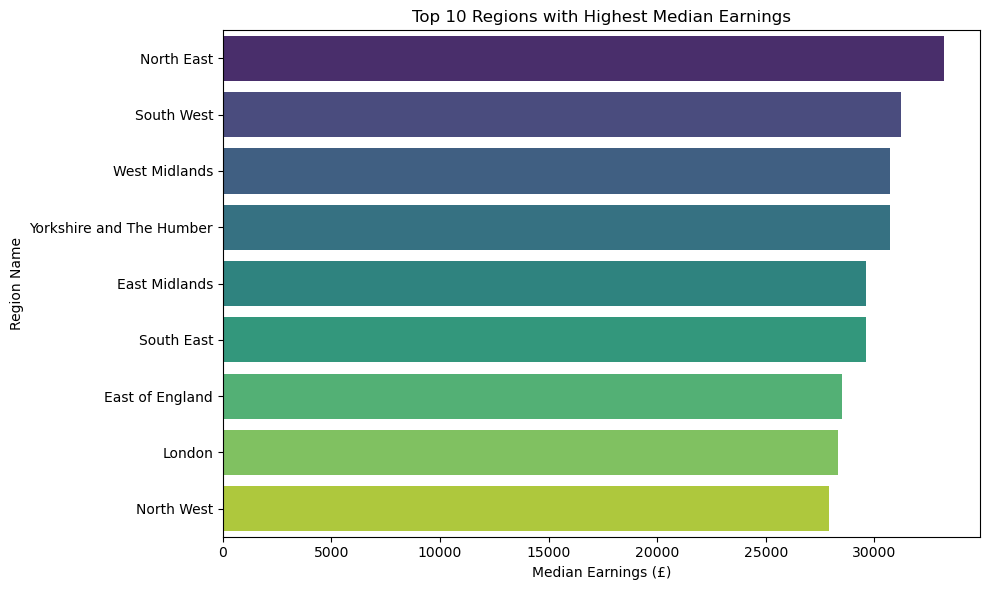

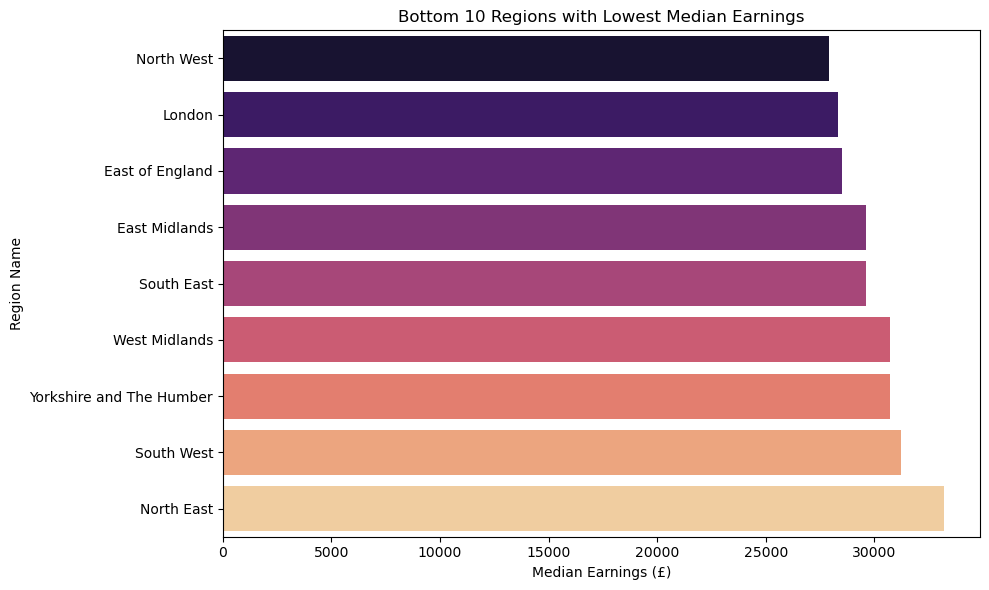

C:\Users\admin\AppData\Local\Temp\ipykernel_5784\3309866860.py:95: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


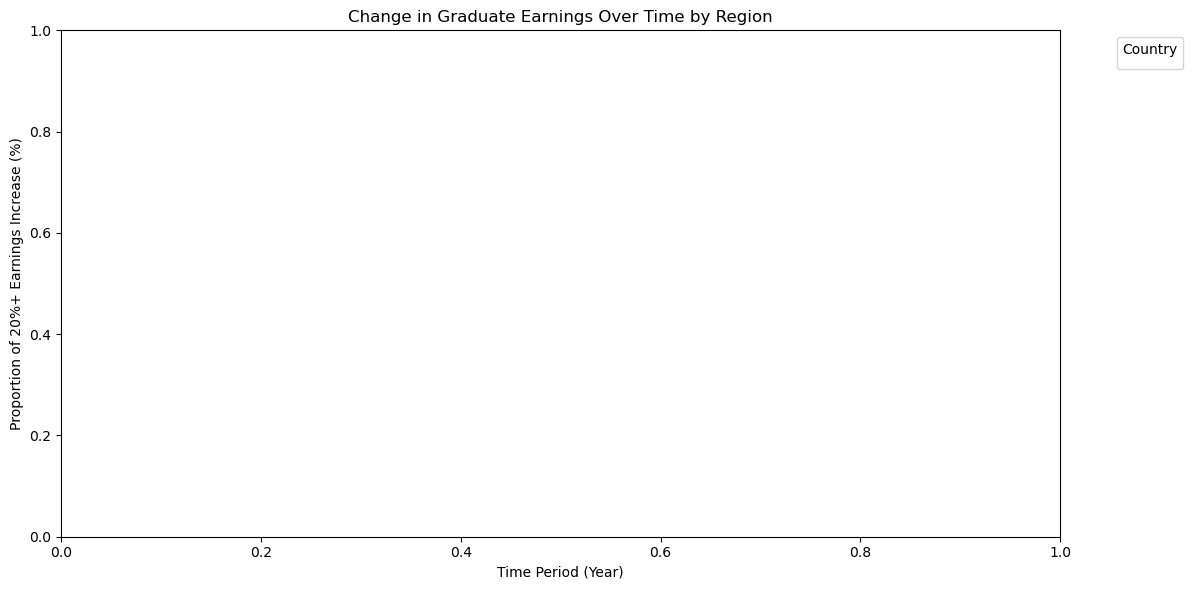

C:\Users\admin\OneDrive - University of Exeter\Desktop\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


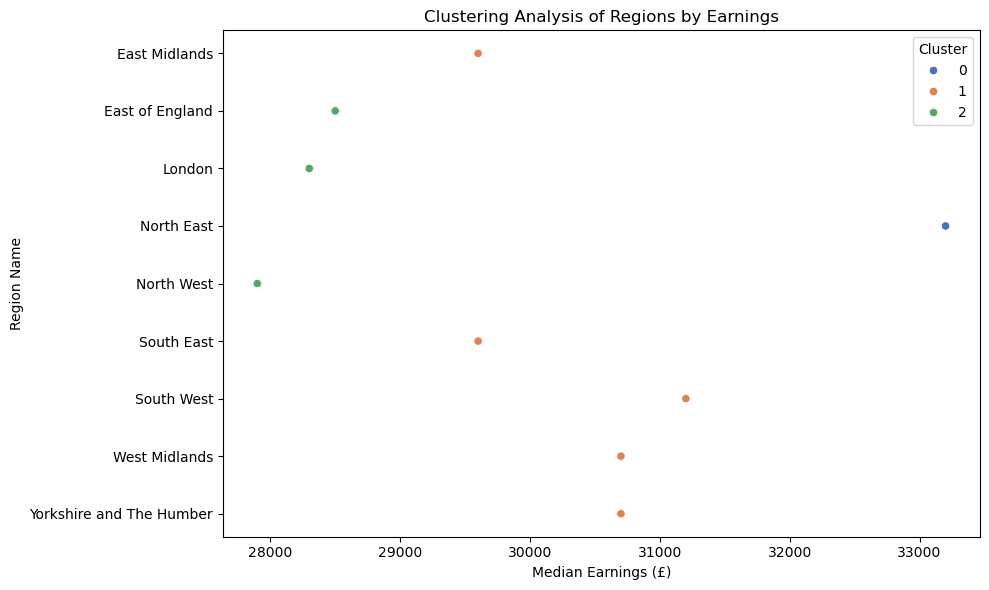


Cluster Summary:
         count          mean         std      min      25%      50%      75%  \
cluster                                                                        
0          1.0  33200.000000         NaN  33200.0  33200.0  33200.0  33200.0   
1          5.0  30360.000000  723.187389  29600.0  29600.0  30700.0  30700.0   
2          3.0  28233.333333  305.505046  27900.0  28100.0  28300.0  28400.0   

             max  
cluster           
0        33200.0  
1        31200.0  
2        28500.0  


In [107]:
#Analysis of Regional Differences in Graduate Earnings 

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# File names 
file_region = 'adjusted_earnings_region_2122_ees.csv'
file_time_series = 'tax_year_comparison_2122ees.csv'

# Load datasets with error handling
try:
    regional_earnings = pd.read_csv(file_region)
    time_series_earnings = pd.read_csv(file_time_series)
except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Ensure that the required CSV files are in the same directory as this script.")
    raise

# Clean column names (make lowercase, remove spaces, replace special characters)
regional_earnings.columns = regional_earnings.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(r'\W', '_', regex=True)
time_series_earnings.columns = time_series_earnings.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(r'\W', '_', regex=True)

# Handle missing values
regional_earnings.dropna(inplace=True)
time_series_earnings.dropna(inplace=True)

# Extract relevant columns for regional analysis
regional_earnings_subset = regional_earnings[['region_name_provider', 'earnings_median']]

# Group by region and calculate median earnings for each region
regional_earnings_grouped = regional_earnings_subset.groupby('region_name_provider').agg(
    median_earnings=('earnings_median', 'median')
).reset_index()

# Identify top 10 and bottom 10 regions by median earnings
top_10_regions = regional_earnings_grouped.sort_values(by='median_earnings', ascending=False).head(10)
bottom_10_regions = regional_earnings_grouped.sort_values(by='median_earnings', ascending=True).head(10)

# Plot Top 10 Regions
plt.figure(figsize=(10, 6))
sns.barplot(x='median_earnings', y='region_name_provider', data=top_10_regions, palette='viridis', hue='region_name_provider', dodge=False)
plt.title('Top 10 Regions with Highest Median Earnings')
plt.xlabel('Median Earnings (£)')
plt.ylabel('Region Name')
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()

# Plot Bottom 10 Regions
plt.figure(figsize=(10, 6))
sns.barplot(x='median_earnings', y='region_name_provider', data=bottom_10_regions, palette='magma', hue='region_name_provider', dodge=False)
plt.title('Bottom 10 Regions with Lowest Median Earnings')
plt.xlabel('Median Earnings (£)')
plt.ylabel('Region Name')
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()

# Extract relevant columns for time-series analysis
try:
    time_series_earnings_subset = time_series_earnings[['country_name', 'time_period', 'prop_20_plus_pct_increase_1516_2122']]
except KeyError as e:
    print(f"Error: {e}")
    print(f"These are the available columns: {list(time_series_earnings.columns)}")
    raise

# Group by region (country_name) and time period to analyze changes in earnings
time_series_earnings_grouped = time_series_earnings_subset.groupby(['country_name', 'time_period']).agg(
    pct_increase=('prop_20_plus_pct_increase_1516_2122', 'mean')
).reset_index()

# Convert 'time_period' to numeric format
time_series_earnings_grouped['time_period'] = pd.to_numeric(time_series_earnings_grouped['time_period'], errors='coerce')

# Drop rows with missing or invalid time periods
time_series_earnings_grouped.dropna(subset=['time_period', 'pct_increase'], inplace=True)

# Ensure time_period values are within a reasonable range (e.g., 2015 to 2022)
time_series_earnings_grouped = time_series_earnings_grouped[
    (time_series_earnings_grouped['time_period'] >= 2015) &
    (time_series_earnings_grouped['time_period'] <= 2022)
]

# Sort values to ensure lines are plotted correctly
time_series_earnings_grouped.sort_values(by=['country_name', 'time_period'], inplace=True)

# Plot earnings increase over time for each region (using lineplot)
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='time_period',
    y='pct_increase',
    hue='country_name',
    data=time_series_earnings_grouped,
    palette='tab10',
    marker='o'
)

# Set plot titles and labels
plt.title('Change in Graduate Earnings Over Time by Region')
plt.xlabel('Time Period (Year)')
plt.ylabel('Proportion of 20%+ Earnings Increase (%)')

# Adjust legend position
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Prepare data for clustering
X = regional_earnings_grouped[['median_earnings']]

# Handle any missing data (if present)
X = X.dropna()

# Perform KMeans clustering to classify regions into 3 clusters (low, medium, high earners)
kmeans = KMeans(n_clusters=3, random_state=42)
regional_earnings_grouped['cluster'] = kmeans.fit_predict(X)

# Plot cluster results
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=regional_earnings_grouped['median_earnings'],
    y=regional_earnings_grouped['region_name_provider'],
    hue=regional_earnings_grouped['cluster'],
    palette='deep'
)
plt.title('Clustering Analysis of Regions by Earnings')
plt.xlabel('Median Earnings (£)')
plt.ylabel('Region Name')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# Print summary of clusters
cluster_summary = regional_earnings_grouped.groupby('cluster')['median_earnings'].describe()
print("\nCluster Summary:")
print(cluster_summary)

In [124]:
#Predictive Modelling of Graduate Earnings

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# File names
file_subject = 'outcomes_earnings_subject_2122ees.csv'
file_region = 'adjusted_earnings_region_2122_ees.csv'

# Load datasets
try:
    subject_earnings = pd.read_csv(file_subject)
    regional_earnings = pd.read_csv(file_region)
except FileNotFoundError as e:
    print(f"Error: {e}")
    raise

# Clean column names (make lowercase, remove spaces, replace special characters)
subject_earnings.columns = subject_earnings.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(r'\W', '_', regex=True)
regional_earnings.columns = regional_earnings.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(r'\W', '_', regex=True)

# Print available columns for debugging
print("\nAvailable columns in subject_earnings:", subject_earnings.columns)
print("\nAvailable columns in regional_earnings:", regional_earnings.columns)

# Filter out 'National' from the subject_earnings dataset
subject_earnings = subject_earnings[subject_earnings['geographic_level'].str.lower() != 'national']

# Standardize region names in 'geographic_level' to match 'region_name_provider'
region_mapping = {
    'yorkshire and humber': 'yorkshire and the humber',
    'all regions in scotland': 'scotland',
    'all regions in wales': 'wales'
}
subject_earnings['geographic_level'] = subject_earnings['geographic_level'].str.strip().str.lower().replace(region_mapping)

# Print unique values for debugging
print("\nUnique values in geographic_level (subject_earnings):", subject_earnings['geographic_level'].unique())
print("\nUnique values in region_name_provider (regional_earnings):", regional_earnings['region_name_provider'].unique())

# Group subject earnings by 'geographic_level'
subject_summary = subject_earnings.groupby('geographic_level').agg(
    subject_median_earnings=('earnings_median', 'median'),
    num_subjects=('subject_name', 'count')
).reset_index()

# Group regional earnings by 'region_name_provider'
regional_summary = regional_earnings.groupby('region_name_provider').agg(
    region_median_earnings=('earnings_median', 'median'),
    regional_employment_score=('earnings_diff', 'mean')
).reset_index()

# Rename 'geographic_level' to match 'region_name_provider' (for better merging)
subject_summary.rename(columns={'geographic_level': 'region_name_provider'}, inplace=True)

# Merge datasets on 'region_name_provider'
combined_data = pd.merge(subject_summary, regional_summary, on='region_name_provider', how='inner')

# Check if combined_data is empty
if combined_data.empty:
    print("\nCombined Data is empty after merge. Check for mismatched or missing data.")
else:
    print("\nCombined Data for Modeling:")
    print(combined_data.head())

# Drop missing values (if any)
combined_data.dropna(inplace=True)

# Feature Engineering
combined_data['regional_employment_score'] = combined_data['regional_employment_score'].fillna(0)

# Define features (X) and target (y)
X = combined_data[['region_median_earnings', 'regional_employment_score', 'num_subjects']]
y = combined_data['subject_median_earnings']

# Ensure there are enough samples for modeling
if len(X) < 2:
    print("\nNot enough data for train-test split. Ensure combined_data has sufficient rows.")
else:
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Linear Regression Model
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)

    # Make predictions
    y_pred_lr = linear_model.predict(X_test)

    # Evaluate Linear Regression model
    mae_lr = mean_absolute_error(y_test, y_pred_lr)
    mse_lr = mean_squared_error(y_test, y_pred_lr)
    rmse_lr = np.sqrt(mse_lr)
    r2_lr = r2_score(y_test, y_pred_lr)

    print("\nMultiple Linear Regression Model Performance:")
    print(f"R²: {r2_lr}, MAE: {mae_lr}, MSE: {mse_lr}, RMSE: {rmse_lr}")

    # Train Decision Tree Regressor
    dt_model = DecisionTreeRegressor(random_state=42)
    dt_model.fit(X_train, y_train)

    # Make predictions
    y_pred_dt = dt_model.predict(X_test)

    # Evaluate Decision Tree Regressor
    mae_dt = mean_absolute_error(y_test, y_pred_dt)
    mse_dt = mean_squared_error(y_test, y_pred_dt)
    rmse_dt = np.sqrt(mse_dt)
    r2_dt = r2_score(y_test, y_pred_dt)

    print("\nDecision Tree Regressor Model Performance:")
    print(f"R²: {r2_dt}, MAE: {mae_dt}, MSE: {mse_dt}, RMSE: {rmse_dt}")

    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': dt_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
    plt.title('Feature Importance from Decision Tree Regressor')
    plt.tight_layout()
    plt.show()

    model_comparison = pd.DataFrame({
        'Model': ['Linear Regression', 'Decision Tree Regressor'],
        'R² Score': [r2_lr, r2_dt],
        'MAE': [mae_lr, mae_dt]
    })

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y='R² Score', data=model_comparison, palette='magma')
    plt.title('Model R² Score Comparison')
    plt.tight_layout()
    plt.show()



Available columns in subject_earnings: Index(['time_period', 'time_identifier', 'geographic_level', 'country_code',
       'country_name', 'subject_name', 'providers_outcomes', 'outcomes_min',
       'outcomes_lq', 'outcomes_median', 'outcomes_uq', 'outcomes_max',
       'outcomes_diff', 'providers_earnings', 'earnings_min', 'earnings_lq',
       'earnings_median', 'earnings_uq', 'earnings_max', 'earnings_diff'],
      dtype='object')

Available columns in regional_earnings: Index(['time_period', 'time_identifier', 'geographic_level', 'country_code',
       'country_name', 'region_name_provider', 'region_code_provider',
       'num_provider', 'earnings_min', 'earnings_lq', 'earnings_median',
       'earnings_uq', 'earnings_max', 'earnings_diff'],
      dtype='object')

Unique values in geographic_level (subject_earnings): []

Unique values in region_name_provider (regional_earnings): ['All regions in Scotland' 'All regions in Wales' 'East Midlands'
 'East of England' 'London' 'North E